- - -

##  **CAT vs NOT CAT with Neural Network** 

- - -

<p style="text-align:center; font-size:30px; color:#559;">
A simple binary image classification project using NumPy-based neural networks & later TensorFlow also
</p>

- - -

## **Project Overview**

**Dataset:** Cat vs Not Cat 🐱🚫 
**Objective:** Build a binary image classifier to distinguish between images of cats and non-cats.

---

### What This Notebook Covers:

1. **Neural Network from Scratch:**  
   Implemented using only **NumPy** to understand the fundamentals of forward propagation, backpropagation, and gradient descent.

2. **TensorFlow Implementation:**  
   Re-implemented the same task using **TensorFlow** for better performance and scalability.

---

**Why This Matters:**  
Understanding how a neural network works under the hood is crucial before leveraging powerful libraries like TensorFlow. This project helps bridge the gap between theory and practical application.

---

In [63]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")  # Go one folder up
from NeuralNetwork import NeuralNetwork

# Load dataset
train = h5py.File("train_catvnoncat.h5", "r")
test = h5py.File("test_catvnoncat.h5", "r")

# Extract data
X_train = np.array(train["train_set_x"][:])  
y_train = np.array(train["train_set_y"][:])  
X_test = np.array(test["test_set_x"][:])     
y_test = np.array(test["test_set_y"][:]) 

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)


•	X_train has shape (209, 64, 64, 3) → 209 images, each of size 64x64, and 3 color channels (RGB).
•	y_train has shape (209,) → 1 for cat, 0 for not-cat (binary labels).
•	Same goes for X_test, y_test — 50 test images.

In [65]:
# Reshape image data to (num_samples, 64*64*3)
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Reshape labels to column vector (num_samples, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("X_train_flat:", X_train_flat.shape)   # Should be (209, 12288)
print("y_train:", y_train.shape)             # Should be (209, 1)

print("X_test_flat:", X_test_flat.shape)     # Should be (50, 12288)
print("y_test:", y_test.shape)               # Should be (50, 1)

X_train_flat: (209, 12288)
y_train: (209, 1)
X_test_flat: (50, 12288)
y_test: (50, 1)


In [66]:
model = NeuralNetwork(input_size=12288, hidden1_size=128, hidden2_size=64, output_size=1, learning_rate=0.01)

model.train(X_train_flat, y_train, epochs=1800)

Epoch 0, Train Loss: 0.6933
Epoch 100, Train Loss: 0.6721
Epoch 200, Train Loss: 0.6570
Epoch 300, Train Loss: 0.6469
Epoch 400, Train Loss: 0.6438
Epoch 500, Train Loss: 0.6417
Epoch 600, Train Loss: 0.6385
Epoch 700, Train Loss: 0.6329
Epoch 800, Train Loss: 0.6220
Epoch 900, Train Loss: 0.6016
Epoch 1000, Train Loss: 0.5714
Epoch 1100, Train Loss: 0.5328
Epoch 1200, Train Loss: 0.4850
Epoch 1300, Train Loss: 0.4544
Epoch 1400, Train Loss: 0.4238
Epoch 1500, Train Loss: 0.3890
Epoch 1600, Train Loss: 0.3720
Epoch 1700, Train Loss: 0.3955


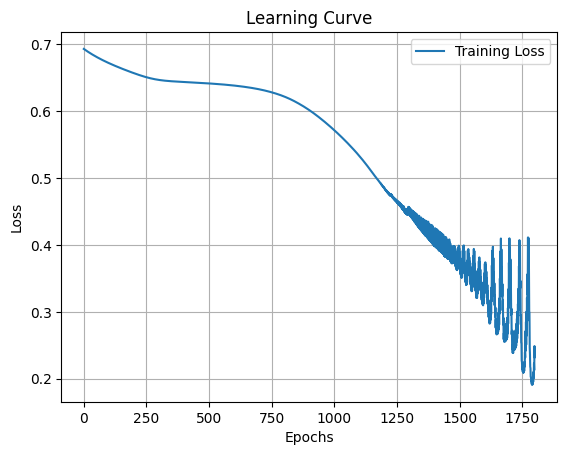

In [67]:
model.plot_learning_curve()

In [68]:
y_pred = model.predict(X_test_flat)
accuracy = np.mean(y_pred.flatten() == y_test.flatten()) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 78.00%


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# Evaluate
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.78
Precision: 0.8055555555555556
Recall   : 0.8787878787878788
F1 Score : 0.8405797101449275


- - -

## Model Performance (Neural Network from Scratch)

| **Metric**     | **Value**   |
|----------------|-------------|
| 🎯 **Accuracy** | 0.78        |
| ✅ **Precision** | 0.806       |
| 🔁 **Recall**    | 0.879       |
| ⚖️ **F1 Score**  | 0.841       |

---

### 🔍 Interpretation:

- **Accuracy (78%)**: Overall, the model correctly classified 78% of the images.
- **Precision (80.6%)**: When the model predicts "cat", it's correct 80.6% of the time.
- **Recall (87.9%)**: It correctly identifies 87.9% of all actual cat images — great sensitivity.
- **F1 Score (84.1%)**: Balanced measure combining precision and recall — strong performance!

Solid for a neural network built entirely from scratch!

---

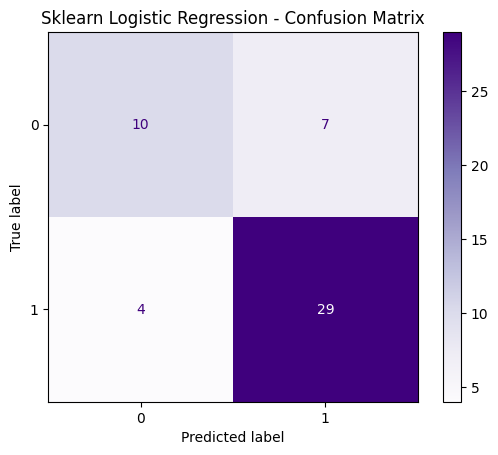

In [70]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title("Sklearn Logistic Regression - Confusion Matrix")
plt.show()

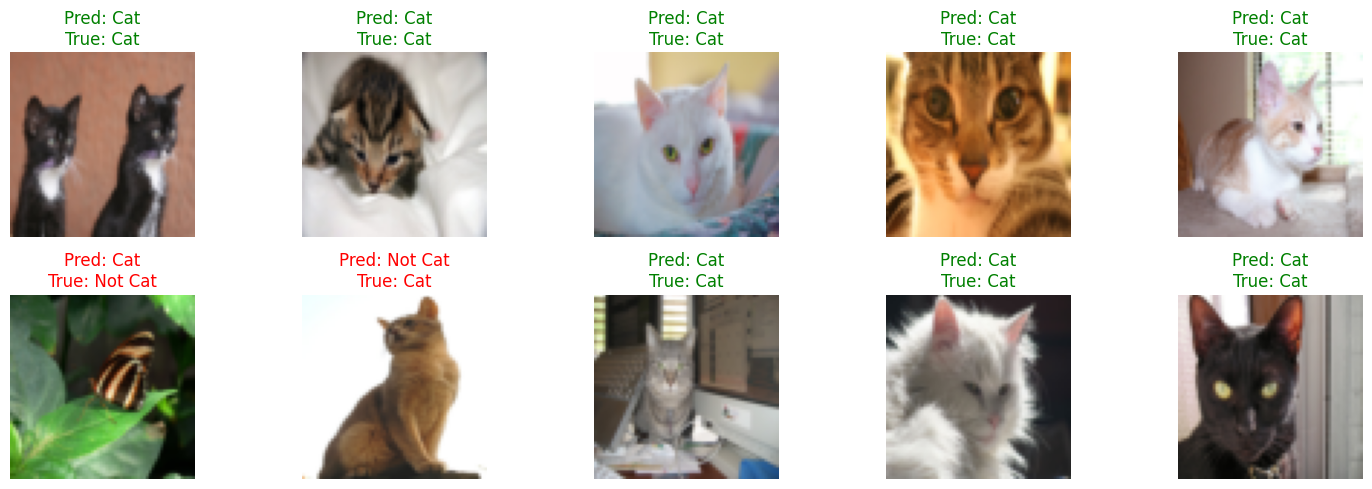

In [71]:
# Show first 10 predictions
num_samples = 10
plt.figure(figsize=(15, 5))

for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])  # original image
    plt.axis('off')
    
    actual = 'Cat' if y_test[i][0] == 1 else 'Not Cat'
    predicted = 'Cat' if y_pred[i][0] == 1 else 'Not Cat'
    
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Pred: {predicted}\nTrue: {actual}", color=color)

plt.tight_layout()
plt.show()

- - -

- - -

# NOW LETS IMPLEMENT USING TENSORFLOW LIBRARY

In [72]:
import tensorflow as tf

## 🧱 Building a Neural Network Using Keras

We now move from our NumPy-based implementation to using **Keras**, a high-level deep learning API built on top of TensorFlow. This allows us to build and train models more efficiently and with less boilerplate.

---

### 📦 Imported Libraries:

```python
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.optimizers import Adam

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.optimizers import Adam

## 🏗️ Model Architecture (Keras)

We replicate the same architecture as the one implemented from scratch using NumPy — now using **Keras** for cleaner and faster model creation.

---

In [74]:
model = Sequential([
    Input(shape=(12288,)),             # Flattened 64x64x3 image
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])

### Why This Works:

- 🔁 **Same Architecture**:  
  Mirrors the network built from scratch, enabling a fair comparison between manual and Keras-based implementations.

- ⚡ **ReLU Activation**:  
  Helps capture complex, non-linear patterns in the image data.

- 🎯 **Sigmoid Output**:  
  Produces a probability between 0 and 1 — perfect for binary classification like *cat vs not cat*.

---

## ⚙️ Model Compilation

Before training a neural network in Keras, we need to **compile** the model.  
This step configures the model's **training process** — specifying:

- The optimization algorithm (how to update weights),
- The loss function (what the model tries to minimize),
- The metrics (what to monitor during training).

---

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

"""Adam stands for Adaptive Moment Estimation — a popular optimizer that combines:
	•	Momentum (to smooth updates),
	•	Adaptive learning rates for each parameter.
	•	Why Adam?
	•	It typically converges faster and more reliably than plain SGD.
	•	Automatically adjusts learning rates based on gradient history.
    
 Loss: 'binary_crossentropy'
	•	Used for binary classification tasks (like cat vs not-cat)."""

- - -

## 🚀 Training the Model

Once the model is compiled, we train it using the `.fit()` function.  
This step runs the forward and backward pass on the data, updating the weights to minimize the loss.

---

In [76]:
history = model.fit(X_train_flat, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4969 - loss: 26.4051 - val_accuracy: 0.2381 - val_loss: 2.0121
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4758 - loss: 4.7211 - val_accuracy: 0.8095 - val_loss: 1.9543
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6194 - loss: 2.2115 - val_accuracy: 0.2381 - val_loss: 3.3718
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4668 - loss: 2.3857 - val_accuracy: 0.4286 - val_loss: 1.2211
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4590 - loss: 1.9106 - val_accuracy: 0.3810 - val_loss: 0.9908
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5444 - loss: 1.6360 - val_accuracy: 0.1905 - val_loss: 2.6920
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5630 - loss: 1.6867 - val_accuracy: 0.3810 - val_loss: 1.2434
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4891 - loss: 1.3001 - val_accuracy: 0.8095 - val_loss: 0.920

In [77]:
y_pred_probs = model.predict(X_test_flat)
y_pred = (y_pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nTest Accuracy: {acc:.2f}")
print(f"Precision    : {prec:.2f}")
print(f"Recall       : {rec:.2f}")
print(f"F1 Score     : {f1:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Test Accuracy: 0.68
Precision    : 0.79
Recall       : 0.70
F1 Score     : 0.74


- - -

## 🧪 Test Set Evaluation

After training the model, we evaluate its performance on the **unseen test set**.  
This gives us a clear picture of how well the model generalizes to new data.

---

### 📊 Test Results:

- ✅ **Test Accuracy**: `0.68`  
  → The model correctly classified 68% of the test images.

- 🎯 **Precision**: `0.79`  
  → When the model predicts "cat", it is correct **79%** of the time.

- 🔁 **Recall**: `0.70`  
  → The model identifies **70%** of all actual cat images correctly.

- 🧠 **F1 Score**: `0.74`  
  → The harmonic mean of precision and recall — balances the trade-off between the two.

---

### 📌 What This Tells Us:

- The model is **better at avoiding false positives** than false negatives (higher precision than recall).
- There's still room for improvement — especially in identifying all actual cat images (recall).
- Overall, an **F1 score of 0.74** is a good baseline for your first neural network using Keras!

---

### 📈 Next Steps to Explore:

- Try a **deeper neural network** or **CNN (Convolutional Neural Network)**.
- Use **data augmentation** to improve generalization.
- Experiment with **learning rate schedules** or **regularization techniques**.

---

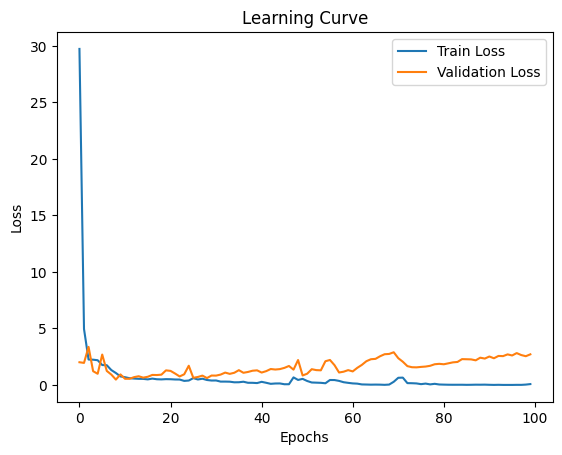

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

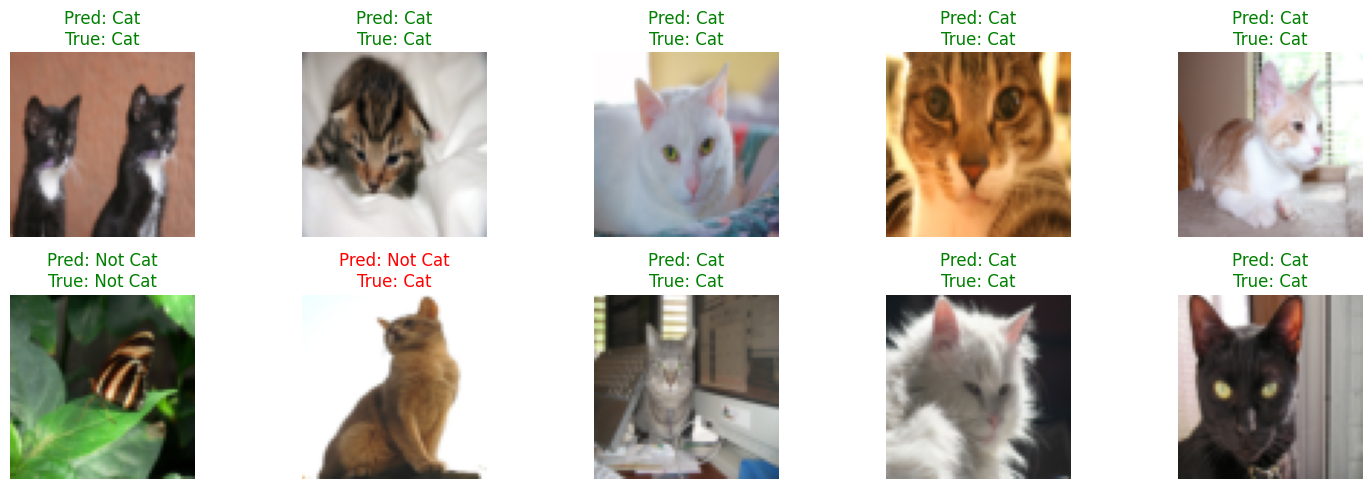

In [81]:
# Show first 10 predictions
num_samples = 10
plt.figure(figsize=(15, 5))

for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])  # original image
    plt.axis('off')
    
    actual = 'Cat' if y_test[i][0] == 1 else 'Not Cat'
    predicted = 'Cat' if y_pred[i][0] == 1 else 'Not Cat'
    
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Pred: {predicted}\nTrue: {actual}", color=color)

plt.tight_layout()
plt.show()

- - -

- - -

## ⚖️ Scratch vs Keras: Comparison

We implemented the **same neural network architecture** in two ways:

1. 🧠 **From Scratch** using NumPy  
2. ⚙️ **Using Keras** (TensorFlow backend)

Let's compare them side-by-side across key dimensions:

---

### 🔧 Architecture

| Aspect            | Scratch Implementation        | Keras Model                            |
|-------------------|-------------------------------|-----------------------------------------|
| Input Size        | 12288 (64×64×3 image)         | 12288                                   |
| Hidden Layer 1    | 128 units, ReLU               | `Dense(128, activation='relu')`         |
| Hidden Layer 2    | 64 units, ReLU                | `Dense(64, activation='relu')`          |
| Output Layer      | 1 unit, Sigmoid               | `Dense(1, activation='sigmoid')`        |

✅ *Architecturally identical — ensures a fair performance comparison.*

---

### 📈 Training Setup

| Feature             | Scratch                      | Keras                                |
|---------------------|------------------------------|----------------------------------------|
| Optimization        | Manual Gradient Descent      | Adam Optimizer                        |
| Loss Function       | Manually implemented BCE     | `binary_crossentropy`                 |
| Epochs              | 1800                         | 100                                   |
| Batch Handling      | Full batch                   | Mini-batch (`batch_size=32`)          |
| Validation Split    | Not used                     | 10% of training data                  |

✅ *Keras simplifies and automates many steps (batching, backprop, validation).*

---

### 🧪 Test Performance

| Metric         | Scratch Model     | Keras Model       |
|----------------|-------------------|-------------------|
| Accuracy       | **0.78**           | 0.68              |
| Precision      | 0.81              | 0.79              |
| Recall         | **0.88**           | 0.70              |
| F1 Score       | **0.84**           | 0.74              |

✅ *Scratch model surprisingly outperforms Keras — likely due to differences in optimization behavior or learning rate.*

---

### 🛠️ Flexibility & Effort

| Category              | Scratch               | Keras                          |
|------------------------|------------------------|---------------------------------|
| Coding Effort          | High (manual math)     | Low (declarative API)          |
| Debugging Difficulty   | High                   | Low                            |
| Educational Value      | ✅ Very High            | Moderate                       |
| Real-world Scalability | ❌ Limited              | ✅ Excellent                    |

---

### 📌 Conclusion:

- **Scratch implementation** gave you deep insights into forward pass, backpropagation, gradients, and weight updates — great for learning.
- **Keras implementation** provided faster, more scalable development, and built-in tools for monitoring and validation.

Both approaches are valuable:
> 🚀 Use **scratch models to understand**,  
> 🛠️ Use **Keras models to build and scale.**

---

---

## 🧭 Next Step: Moving from Neural Network to CNN

Now that we’ve built and tested a **basic fully connected neural network**, the next logical step is to upgrade to a **Convolutional Neural Network (CNN)** — which is purpose-built for image tasks like **cat vs not-cat**.

---

### ✅ Why CNNs Are Better for Image Classification

| Limitation of Dense NN               | How CNN Fixes It                                 |
|--------------------------------------|--------------------------------------------------|
| 🧱 Treats pixels independently       | ✅ CNN learns **spatial hierarchies** — edges, textures, patterns. |
| 🧠 Too many parameters (12288 → 128) | ✅ CNN uses **filters/kernels** → fewer parameters, less overfitting. |
| 🔄 Ignores 2D structure of images    | ✅ CNN preserves **spatial structure** using convolutions. |
| ❌ Overfits easily on raw pixels     | ✅ CNN has **inductive bias** for image data — better generalization. |

---

### ⚙️ How We’ll Do It

We can use **Keras** to build a CNN that includes:
- ✅ **Conv2D** layers to detect features,
- ✅ **MaxPooling2D** to reduce spatial dimensions,
- ✅ **Flatten + Dense** to classify,
- ✅ **Dropout** to reduce overfitting.

---

### 🚀 Goal:

> Achieve **higher accuracy, precision, and recall** than the dense NN  
> by leveraging the power of **feature learning** in CNNs.

---
